#### Import necessary libraries

In [28]:
import tensorflow as tf
print(tf.__version__)

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.feature_selection import f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

2.18.0


#### Drop Columns

In [29]:
DROP_COLS = ["longitude", "latitude"]

#### Load Dataset

In [30]:
file_path = "../../../data/merged_v3.csv"
# Create a Path object
data_file_path = Path(file_path)
df = pd.read_csv(data_file_path)

In [31]:
df.head()

,longitude,latitude,Area,Soil group,Land class,Soil type,pH,SOC,Nitrogen,Potassium,Phosphorus,Sulfur,Boron,Zinc,Sand,Silt,Clay
0,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,5.0,1.27,0.08,0.15,19.6,37.7,0.26,0.86,33.0,33.0,33.0
1,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,4.9,1.47,0.09,0.25,4.1,32.0,0.25,0.75,33.0,33.0,33.0
2,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,4.6,1.07,0.05,0.09,13.3,13.5,0.27,0.95,33.0,33.0,33.0
3,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,5.2,1.51,0.06,0.30,20.2,30.0,0.28,1.00,33.0,33.0,33.0
4,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,5.3,1.08,0.11,0.17,20.5,27.8,0.30,1.04,33.0,33.0,33.0


In [32]:
print(f"Unique Values in 'Area' col:\n {df['Area'].unique()}\n")
print("*" * 120)
print(f"Unique Values in 'Soil group' col:\n {df['Soil group'].unique()}\n")
print("*" * 120)
print(f"Unique Values in 'Land class' col\n: {df['Land class'].unique()}\n")
print("*" * 120)
print(f"Unique Values in 'Soil type' col\n: {df['Soil type'].unique()}\n")

Unique Values in 'Area' col:
 ['Mithpukur' 'Pirgacha ' 'Gangachara' 'Kaunia upazila' 'Taraganj Thana'
 'Bauchi' 'Taraba' 'Plateau' 'Kaduna' 'Nasarawa' 'Niger' 'Kebbi' 'Kano'
 'Kwara' 'Katsina' 'Adamawa']

************************************************************************************************************************
Unique Values in 'Soil group' col:
 ['belab' 'Noadda' 'Sahapur' 'the moon' 'the pen' 'Khilgaon' 'Pirgacha'
 'Palashbari' 'Berries' 'Gangachara' 'Kaunia' 'Imadpur'
 'Alluvial soil of Teesta' 'Teesta sandy soil' 'Kachna' 'The militants'
 'Chilmari' 'Saghata' 'recession' 'Menanagar' 'Bhimpur' 'Indrail' 'isda']

************************************************************************************************************************
Unique Values in 'Land class' col
: ['high ground' 'Medium high land' 'Medium low land'
 'Deep medium high land' 'Shallow to medium high land' 'isda']

*******************************************************************************************

In [33]:
df.describe()

,longitude,latitude,pH,SOC,Nitrogen,Potassium,Phosphorus,Sulfur,Boron,Zinc,Sand,Silt,Clay
count,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000
mean,22.979895,12.711743,5.869107,1.002453,0.070375,0.238226,8.586086,8.843246,0.113593,1.187543,56.202786,22.819659,20.175310
std,31.597277,6.212016,0.518722,0.626685,0.039282,0.140441,9.266400,5.267589,0.132118,0.470586,10.998711,7.472131,5.535707
min,4.430300,8.039070,4.100000,0.100000,0.000800,0.000000,0.060000,0.650000,0.001611,0.080000,20.000000,10.000000,10.000000
25%,6.972760,9.251048,5.536365,0.553925,0.040000,0.138462,3.664697,5.668802,0.024444,0.879671,51.000000,18.000000,16.000000
50%,8.617840,9.971485,5.913315,0.807029,0.062176,0.209134,5.714590,7.243420,0.060213,1.143550,58.000000,20.000000,20.000000
75%,10.430405,11.159215,6.226348,1.290080,0.092213,0.313721,9.579792,10.298875,0.154269,1.443010,64.000000,24.000000,22.000000
max,89.416700,25.850000,7.945400,4.480000,0.257264,0.990000,74.500000,39.700000,0.990000,4.000000,80.000000,40.000000,60.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   longitude   2584 non-null   float64
 1   latitude    2584 non-null   float64
 2   Area        2584 non-null   object 
 3   Soil group  2584 non-null   object 
 4   Land class  2584 non-null   object 
 5   Soil type   2584 non-null   object 
 6   pH          2584 non-null   float64
 7   SOC         2584 non-null   float64
 8   Nitrogen    2584 non-null   float64
 9   Potassium   2584 non-null   float64
 10  Phosphorus  2584 non-null   float64
 11  Sulfur      2584 non-null   float64
 12  Boron       2584 non-null   float64
 13  Zinc        2584 non-null   float64
 14  Sand        2584 non-null   float64
 15  Silt        2584 non-null   float64
 16  Clay        2584 non-null   float64
dtypes: float64(13), object(4)
memory usage: 343.3+ KB


In [35]:
print(df.isnull().values.any())
print(df.isnull().sum().sum())
print("\n")
print(df.isnull().sum())

False
0


longitude     0
latitude      0
Area          0
Soil group    0
Land class    0
Soil type     0
pH            0
SOC           0
Nitrogen      0
Potassium     0
Phosphorus    0
Sulfur        0
Boron         0
Zinc          0
Sand          0
Silt          0
Clay          0
dtype: int64


#### Define target variable and features

In [36]:
targets = ["Boron", "Zinc", "SOC"]
features = [col for col in df.columns if col not in targets]

#### drop raw longitude and latitude if present

In [37]:
if 'longitude' in features and 'latitude' in features:
    features.remove(DROP_COLS[0])
    features.remove(DROP_COLS[1])

In [38]:
print(f"Targe: {targets}")
print(f"Features: {features}")

Targe: ['Boron', 'Zinc', 'SOC']
Features: ['Area', 'Soil group', 'Land class', 'Soil type', 'pH', 'Nitrogen', 'Potassium', 'Phosphorus', 'Sulfur', 'Sand', 'Silt', 'Clay']


#### Identify categorical and numerical features

In [39]:
categorical_features = df[features].select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = df[features].select_dtypes(include=['number']).columns.tolist()

In [40]:
print(f"Categorical Features:\n {categorical_features}\n")
print(f"Numerical Features:\n {numerical_features}\n")

Categorical Features:
 ['Area', 'Soil group', 'Land class', 'Soil type']

Numerical Features:
 ['pH', 'Nitrogen', 'Potassium', 'Phosphorus', 'Sulfur', 'Sand', 'Silt', 'Clay']



#### 1. Analyze Ccategorical_features

In [41]:
# for feature in categorical_features:
#     print(f"Distribution of {feature}:\n")
#     print(df[feature].value_counts())
#     print("\n")

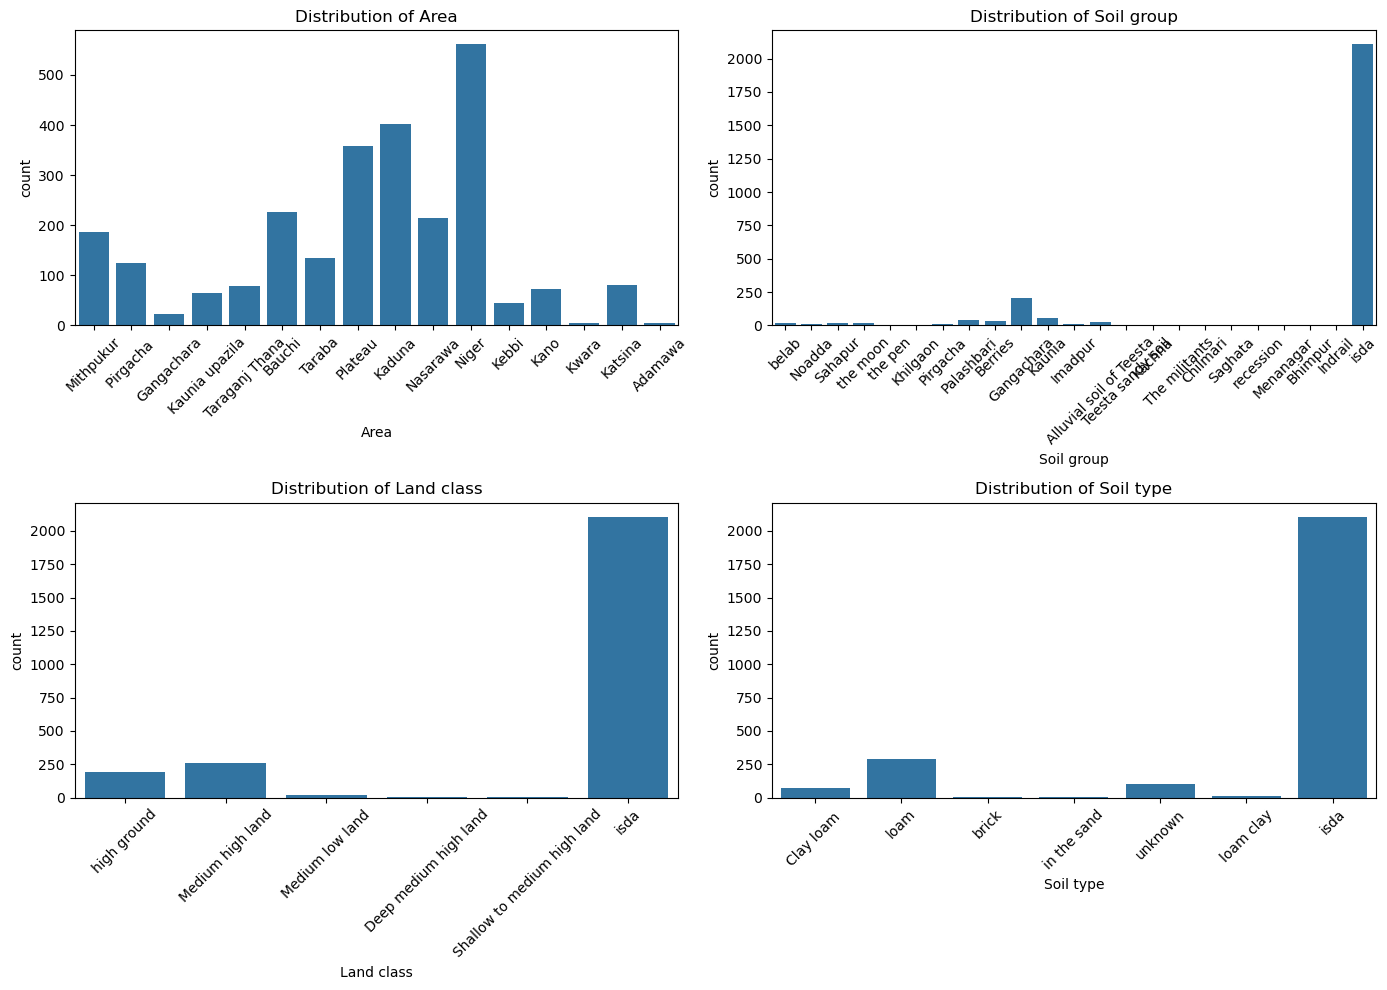

In [42]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows and 2 columns

# Flatten the axes for easy indexing
axes = axes.flatten()

# Loop through the categorical features and plot
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

#### 2. Analyze Numerical Features

##### 1. Histograms: To visualize the distributions of numerical variables:

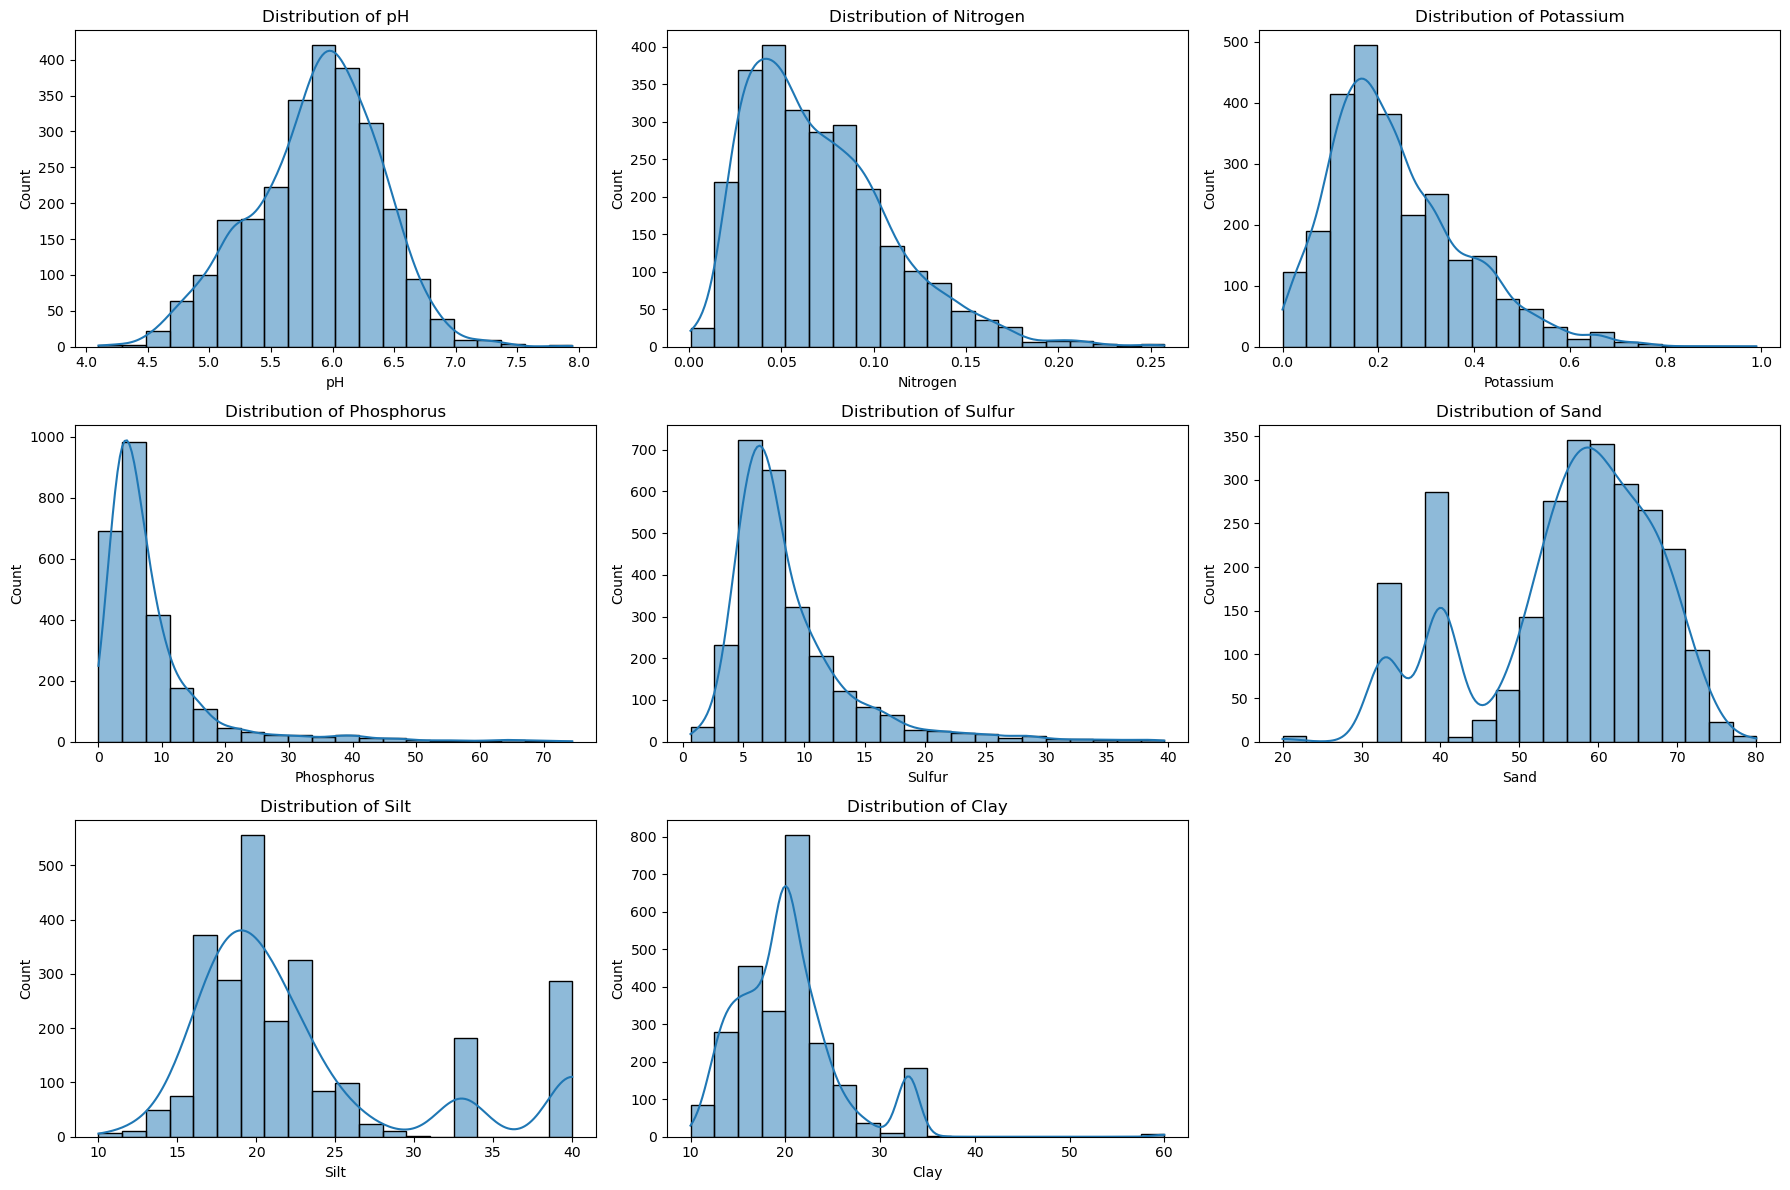

In [43]:
# Set up the number of rows and columns
num_features = len(numerical_features)
cols = 3  # Number of columns per row
rows = (num_features + cols - 1) // cols  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, 12))

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through numerical features and plot
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")

# Remove unused subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

# Adjust Layout
plt.tight_layout()
plt.show()

##### 2. Check for Outliers

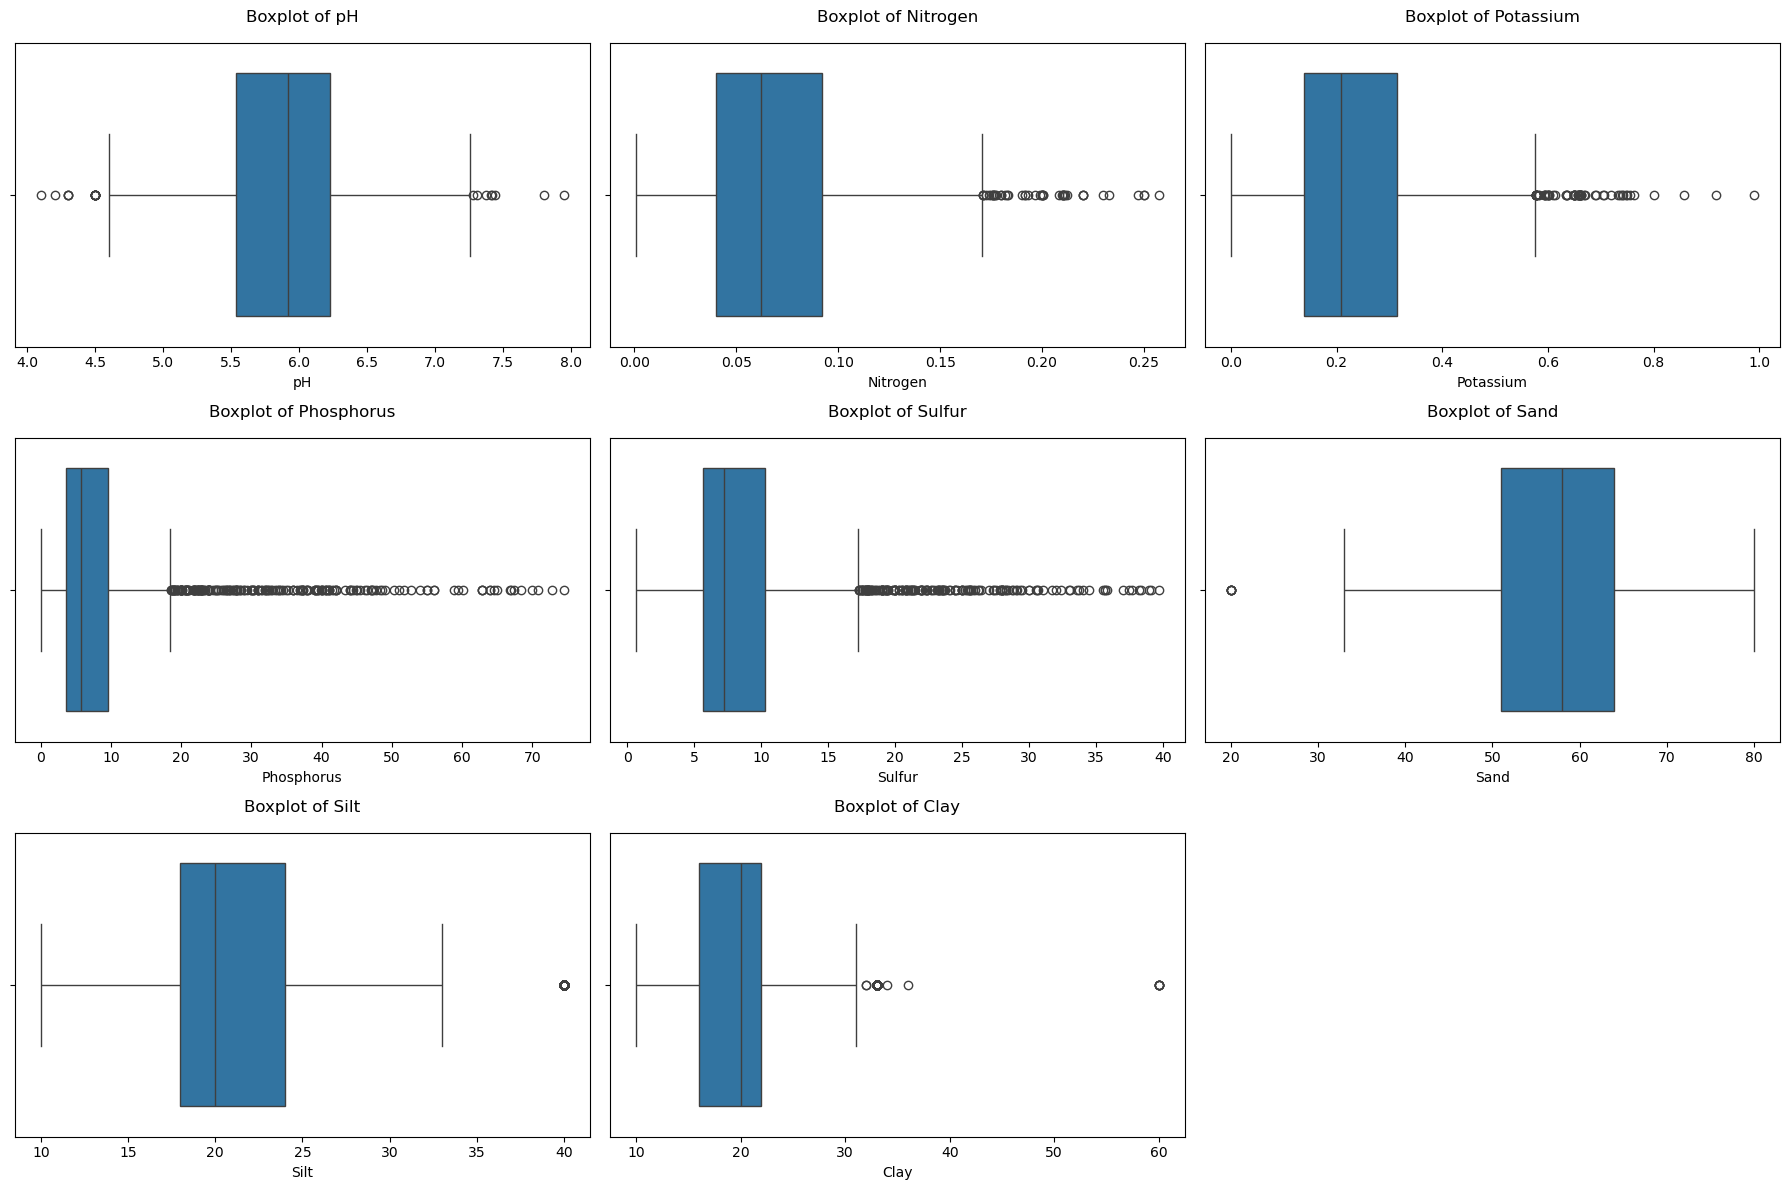

In [44]:
# Set the number of columns per row
cols = 3  # 3 plots in each row
num_features = len(numerical_features)
rows = (num_features + cols - 1) // cols  # Calculate the required number of rows dynamically

# Create subplots dynamically
fig, axes = plt.subplots(rows, cols, figsize=(18, 4 * rows))  # Adjust height for rows

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through the numerical features and plot boxplots
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f"Boxplot of {feature}", pad=15)  # Add padding for the title

# Remove unused subplots (if any)
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

##### 3. Display Range of Values in Numerical Features without Outliers

In [45]:
#df.drop(["longitude", "latitude"], axis=1).describe()

In [46]:
# Function to calculate the range without outliers
def range_without_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[feature].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    filtered_data = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    
    # Return the range
    min_val = filtered_data[feature].min()
    max_val = filtered_data[feature].max()
    return min_val, max_val

# Display the range for each numerical feature
print(f"\nRange of Values in Each Column (Numerical) without Outliers")
print("*" * 59, "\n")
for feature in numerical_features:
    min_val, max_val = range_without_outliers(df, feature)
    print(f"{feature}: Min: {min_val}, Max: {max_val}\n")


Range of Values in Each Column (Numerical) without Outliers
*********************************************************** 

pH: Min: 4.6, Max: 7.25826

Nitrogen: Min: 0.0008, Max: 0.170421

Potassium: Min: 0.0, Max: 0.5761871794871795

Phosphorus: Min: 0.06, Max: 18.4091

Sulfur: Min: 0.65, Max: 17.236

Sand: Min: 33.0, Max: 80.0

Silt: Min: 10.0, Max: 33.0

Clay: Min: 10.0, Max: 31.0



##### 4. Remove Outliers

In [47]:
# Function to remove outliers based on IQR
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[feature].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the dataset to include only non-outliers
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

# Dynamically apply the function to each numerical feature
for feature in numerical_features:
    df = remove_outliers(df, feature)

# Print the cleaned dataset
print("\nDataset after removing outliers:")
print("*"* 32, "\n")
df.drop(["longitude", "latitude"], axis=1).describe()


Dataset after removing outliers:
******************************** 



,pH,SOC,Nitrogen,Potassium,Phosphorus,Sulfur,Boron,Zinc,Sand,Silt,Clay
count,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.00000,1919.000000,1919.000000
mean,6.017814,0.764547,0.060151,0.232871,5.822417,7.201070,0.060154,1.233892,60.80198,19.638874,18.750912
std,0.382439,0.358434,0.031715,0.122800,3.360420,2.423702,0.064027,0.364614,6.46450,2.969847,4.022158
min,4.786180,0.112145,0.008374,0.007503,0.898422,2.693880,0.001611,0.410652,42.00000,12.000000,11.000000
25%,5.762910,0.501053,0.035342,0.145643,3.401910,5.462990,0.018676,0.971566,56.00000,18.000000,15.000000
50%,6.014530,0.690881,0.052637,0.210388,4.881550,6.709600,0.039700,1.203400,61.00000,19.000000,19.000000
75%,6.279655,0.953448,0.077581,0.312228,7.390085,8.374930,0.080021,1.460230,66.00000,22.000000,22.000000
max,7.248150,3.384200,0.169766,0.577477,17.617800,15.453600,0.705266,2.621300,78.00000,28.000000,32.000000


#### 3. Analyze Relationships Between Features and Targets

##### 1. Categorical Features vs Targets

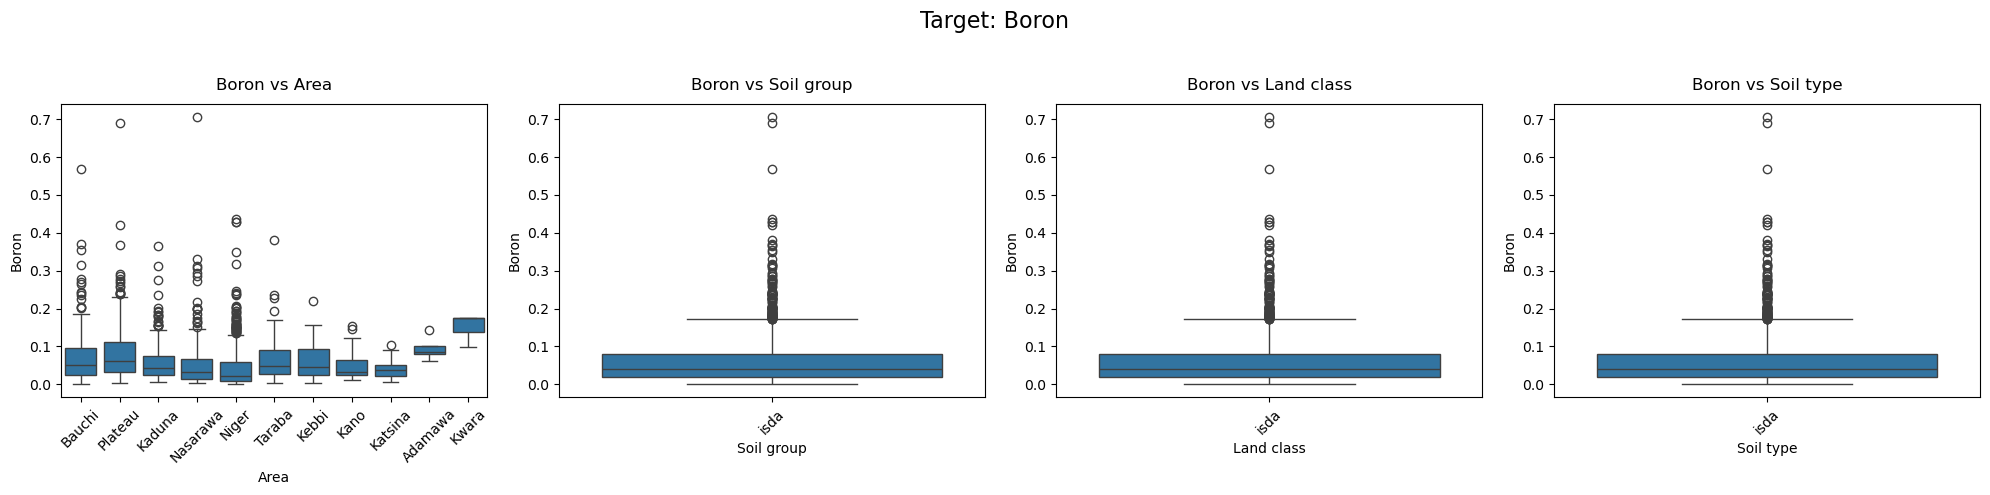

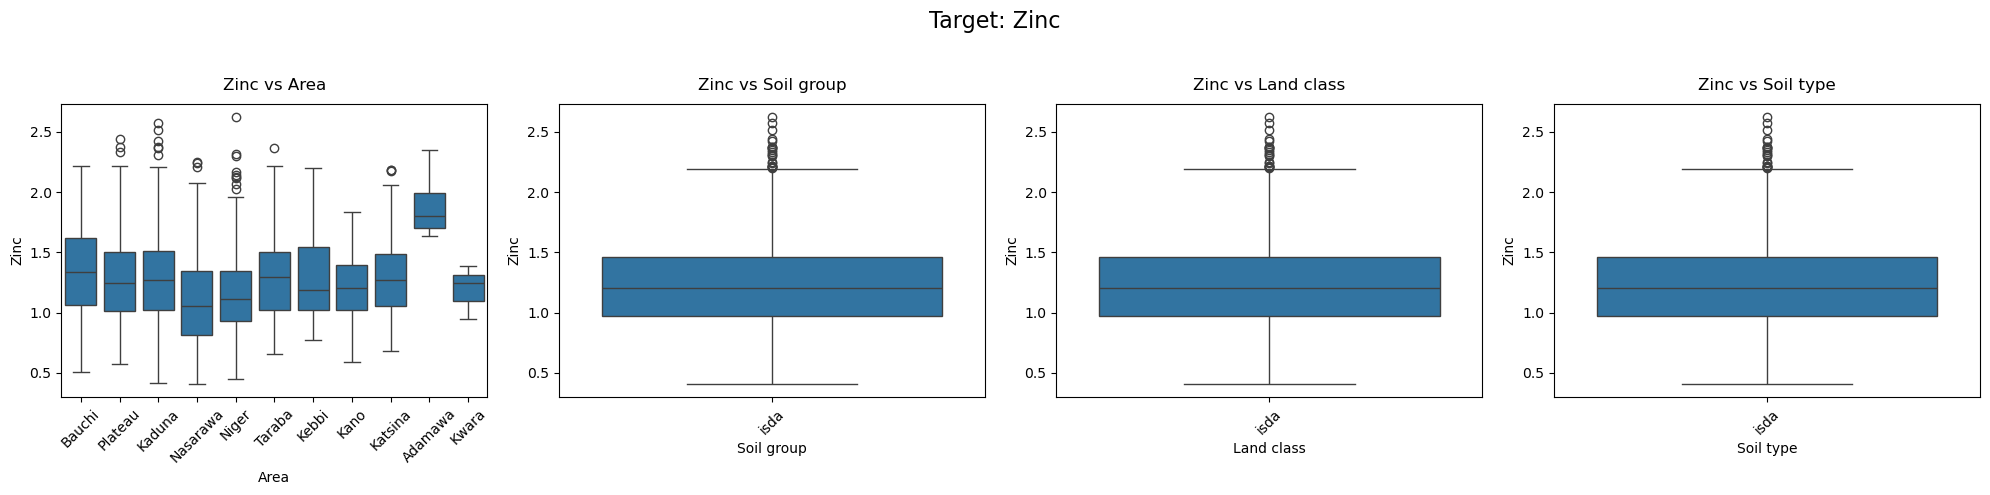

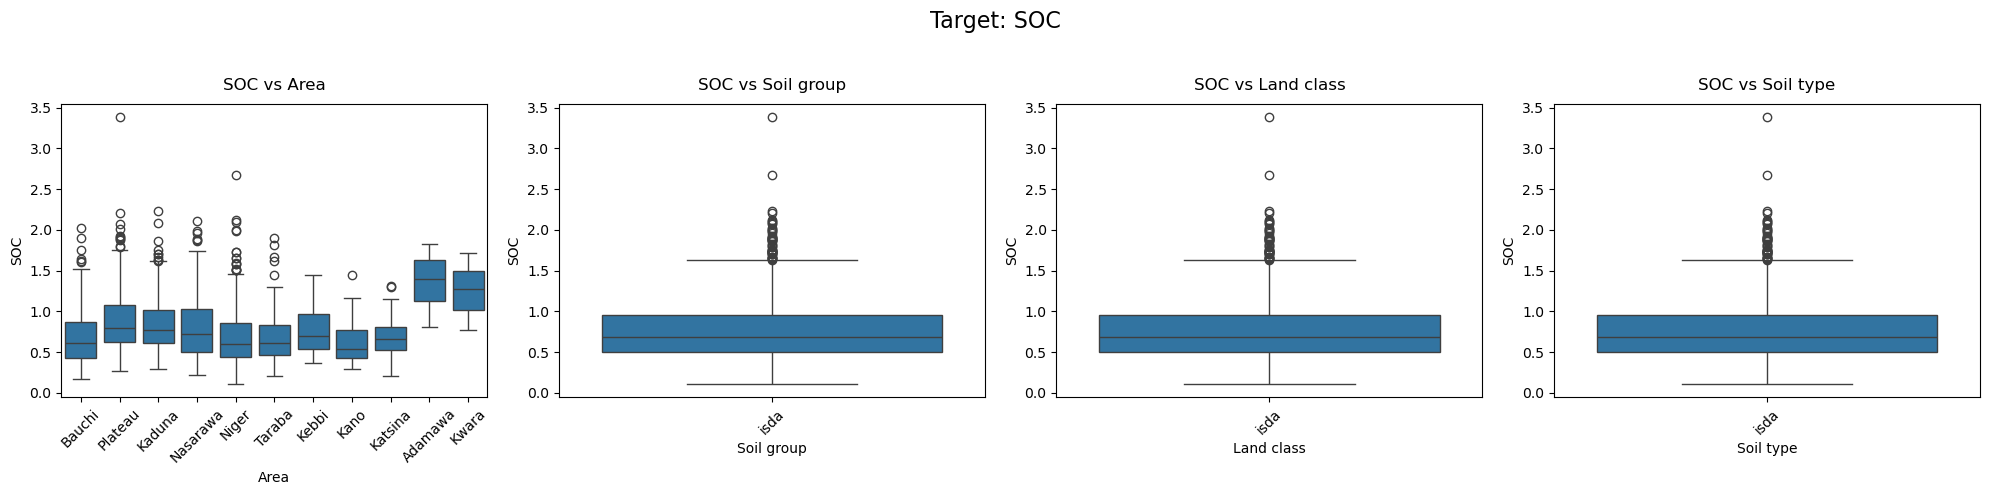

In [48]:
# Create subplots dynamically
for i, target in enumerate(targets):
    # One row, multiple columns
    fig, axes = plt.subplots(1, len(categorical_features), figsize=(20, 5))  
    
    for j, feature in enumerate(categorical_features):
        sns.boxplot(data=df, x=feature, y=target, ax=axes[j])
        axes[j].set_title(f"{target} vs {feature}", pad=10)
        axes[j].tick_params(axis='x', rotation=45)
    
    # Adjust layout for the current row
    plt.suptitle(f"Target: {target}", fontsize=16)
    # Add space for the suptitle
    plt.tight_layout(rect=[0, 0, 1, 0.95])  
    plt.show()


In [49]:
# Step 1: Check unique categories for each feature
for feature in categorical_features:
    print(f"{feature}: {df[feature].nunique()} unique categories")

# Step 2: Filter categorical features with more than one unique category
valid_categorical_features = [feature for feature in categorical_features if df[feature].nunique() > 1]
print(f"Valid Category Features: {valid_categorical_features}")

# Step 3: Perform ANOVA for each target
anova_results_all_targets = {}

for target in targets:
    anova_results = {}  # To store results for the current target
    # print(f"\nPerforming ANOVA for target: {target}")
    
    for feature in valid_categorical_features:
        # Group target values by the categorical feature
        groups = [df[df[feature] == category][target].dropna() for category in df[feature].unique()]
        
        # Perform one-way ANOVA
        if len(groups) > 1:  # Ensure at least two groups exist
            f_stat, p_value = f_oneway(*groups)
            anova_results[feature] = {'F-Statistic': f_stat, 'p-value': p_value}
    
    # Convert results to a DataFrame
    anova_results_df = pd.DataFrame(anova_results).T
    anova_results_df['Significant'] = anova_results_df['p-value'] < 0.05
    
    # Store results for the current target
    anova_results_all_targets[target] = anova_results_df

# Step 4: Display all results after the loop
for target, results_df in anova_results_all_targets.items():
    print(f"\nANOVA Results for {target}:")
    print("*" * 25)
    print(results_df)

    # Optionally save to a CSV or Excel file
    # results_df.to_csv(f"anova_results_{target}.csv", index=True)
    # results_df.to_excel(f"anova_results_{target}.xlsx", index=True)

Area: 11 unique categories
Soil group: 1 unique categories
Land class: 1 unique categories
Soil type: 1 unique categories
Valid Category Features: ['Area']

ANOVA Results for Boron:
*************************
      F-Statistic       p-value  Significant
Area    10.222453  6.009252e-17         True

ANOVA Results for Zinc:
*************************
      F-Statistic       p-value  Significant
Area    11.877868  4.192651e-20         True

ANOVA Results for SOC:
*************************
      F-Statistic       p-value  Significant
Area    14.224733  1.382973e-24         True


In [50]:
# Filter features with more than one unique category
categorical_features = [feature for feature in categorical_features if df[feature].nunique() > 1]
print(f"Updated Categorical Features: {categorical_features}")

Updated Categorical Features: ['Area']


##### 2. Numerical Features vs Targets

##### a. Correlation Analysis

In [51]:
# Numerical features and targets
# numerical_features = ['pH', 'Nitrogen', 'Potassium', 'Phosphorus', 'Sulfur', 'Sand', 'Silt', 'Clay']
# targets = ["Boron", "Zinc", "SOC"]

# Correlation results
correlation_results = {}

for target in targets:
    correlations = df[numerical_features + [target]].corr()[target].drop(target)
    correlation_results[target] = correlations

# Convert to DataFrame for better readability
correlation_df = pd.DataFrame(correlation_results)

# Display the correlations
print("Correlation Analysis:")
print("*" * 21)
print(correlation_df)

# Highlight strong correlations
threshold = 0.3  # Set a threshold for significance
relevant_features = {}
for target in targets:
    relevant_features[target] = correlation_df[abs(correlation_df[target]) > threshold].index.tolist()

# Dynamically Split Numerical Features
numFeatures_GroupA_Boron = relevant_features.get("Boron", [])
numFeatures_GroupA__Zinc = relevant_features.get("Zinc", [])
numFeatures_GroupA__SOC = relevant_features.get("SOC", [])

# Display Results
print("\nRelevant Features for Each Target (Correlation > 0.3):")
print("*" * 54)

if numFeatures_GroupA_Boron:
    print(f"Boron: {numFeatures_GroupA_Boron}")
else:
    print("Boron: No relevant features found (Correlation <= 0.3)")

if numFeatures_GroupA_Zinc:
    print(f"Zinc: {numFeatures_GroupA_Zinc}")
else:
    print("Zinc: No relevant features found (Correlation <= 0.3)")

if numFeatures_GroupA_SOC:
    print(f"SOC: {numFeatures_GroupA_SOC}")
else:
    print("SOC: No relevant features found (Correlation <= 0.3)")

Correlation Analysis:
*********************
               Boron      Zinc       SOC
pH          0.145162  0.050770 -0.173280
Nitrogen    0.494128  0.422201  0.856755
Potassium   0.515467  0.481780  0.471663
Phosphorus  0.197268  0.213539  0.041360
Sulfur      0.373968  0.191483  0.517113
Sand       -0.192621 -0.219357 -0.275283
Silt       -0.029621  0.013045 -0.009127
Clay        0.198998  0.216002  0.262799

Relevant Features for Each Target (Correlation > 0.3):
******************************************************
Boron: ['Nitrogen', 'Potassium', 'Sulfur']
Zinc: ['Nitrogen', 'Potassium']
SOC: ['Nitrogen', 'Potassium', 'Sulfur']


##### b. Handle Multicollinearity for Regression Models

In [52]:
# Flags
REGRESSION_MODEL = True  # Set this flag to True if a regression model is being used

# Function to handle multicollinearity and create another group
def handle_multicollinearity(features, df, threshold=0.7):
    correlation_matrix = df[features].corr()  # Compute correlation matrix
    high_corr_pairs = []  # To store highly correlated pairs

    # Identify pairs of highly correlated features
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append((features[i], features[j]))

    # Dynamically create a second group
    group_without_multicollinearity = set(features)  # Start with all features
    for f1, f2 in high_corr_pairs:
        # Remove one of the correlated features from the adjusted group
        # Keep the first feature and remove the second for simplicity
        if f2 in group_without_multicollinearity:
            group_without_multicollinearity.remove(f2)

    return list(group_without_multicollinearity), high_corr_pairs


# Check and dynamically create groups for each target
# Boron
if numFeatures_GroupA_Boron:
    print("\nHandling Multicollinearity for Boron:")
    numFeatures_GroupB_Boron, high_corr_pairs_boron = handle_multicollinearity(numFeatures_GroupA_Boron, df)
    print(f"Group A (original): {numFeatures_GroupA_Boron}")
    print(f"Group B (adjusted): {numFeatures_GroupB_Boron}")
    if high_corr_pairs_boron:
        print("Highly Correlated Pairs:")
        for pair in high_corr_pairs_boron:
            print(pair)
        if REGRESSION_MODEL:
            print("Use Group B for regression.")
        else:
            print("Group B created but not needed for tree-based models.")
    else:
        print("No multicollinearity found.")
        if REGRESSION_MODEL:
            print("Use Group A for regression.")
        else:
            print("Use Group A for tree-based models.")

# Zinc
if numFeatures_GroupA_Zinc:
    print("\nHandling Multicollinearity for Zinc:")
    numFeatures_GroupB_Zinc, high_corr_pairs_zinc = handle_multicollinearity(numFeatures_GroupA_Zinc, df)
    print(f"Group A (original): {numFeatures_GroupA_Zinc}")
    print(f"Group B (adjusted): {numFeatures_GroupB_Zinc}")
    if high_corr_pairs_zinc:
        print("Highly Correlated Pairs:")
        for pair in high_corr_pairs_zinc:
            print(pair)
        if REGRESSION_MODEL:
            print("Use Group B for regression.")
        else:
            print("Group B created but not needed for tree-based models.")
    else:
        print("No multicollinearity found.")
        if REGRESSION_MODEL:
            print("Use Group A for regression.")
        else:
            print("Use Group A for tree-based models.")

# SOC
if numFeatures_GroupA_SOC:
    print("\nHandling Multicollinearity for SOC:")
    numFeatures_GroupB_SOC, high_corr_pairs_soc = handle_multicollinearity(numFeatures_GroupA_SOC, df)
    print(f"Group A (original): {numFeatures_GroupA_SOC}")
    print(f"Group B (adjusted): {numFeatures_GroupB_SOC}")
    if high_corr_pairs_soc:
        print("Highly Correlated Pairs:")
        for pair in high_corr_pairs_soc:
            print(pair)
        if REGRESSION_MODEL:
            print("Use Group B for regression.")
        else:
            print("Group B created but not needed for tree-based models.")
    else:
        print("No multicollinearity found.")
        if REGRESSION_MODEL:
            print("Use Group A for regression.")
        else:
            print("Use Group A for tree-based models.")


Handling Multicollinearity for Boron:
Group A (original): ['Nitrogen', 'Potassium', 'Sulfur']
Group B (adjusted): ['Nitrogen', 'Sulfur', 'Potassium']
No multicollinearity found.
Use Group A for regression.

Handling Multicollinearity for Zinc:
Group A (original): ['Nitrogen', 'Potassium']
Group B (adjusted): ['Nitrogen', 'Potassium']
No multicollinearity found.
Use Group A for regression.

Handling Multicollinearity for SOC:
Group A (original): ['Nitrogen', 'Potassium', 'Sulfur']
Group B (adjusted): ['Nitrogen', 'Sulfur', 'Potassium']
No multicollinearity found.
Use Group A for regression.


##### b. Statistical Tests (ANOVA or t-tests)

In [53]:
# Perform statistical test for each target
statistical_results = {}
relevant_features = {}  # Dictionary to store relevant features for each target

for target in targets:
    # Separate features and target
    X = df[numerical_features]
    y = df[target]
    
    # Perform F-statistic test
    f_stat, p_values = f_regression(X, y)
    
    # Store results in a DataFrame
    result_df = pd.DataFrame({
        'Feature': numerical_features,
        'F-Statistic': f_stat,
        'p-value': p_values
    }).sort_values(by='p-value')
    
    # Save results for the current target
    statistical_results[target] = result_df
    
    # Filter features with p-value < 0.05
    relevant_features[target] = result_df[result_df['p-value'] < 0.05]['Feature'].tolist()

# Display statistical analysis for each target
for target, result_df in statistical_results.items():
    print(f"\nStatistical Analysis for Target: {target}")
    print("*" * 39)
    print(result_df)

# Dynamically Split Numerical Features
numFeatures_GroupA_Boron = relevant_features.get("Boron", [])
numFeatures_GroupA_Zinc = relevant_features.get("Zinc", [])
numFeatures_GroupA_SOC = relevant_features.get("SOC", [])

# Display relevant features for each target
print("\nRelevant Features for Each Target (p-value < 0.05):")
print("*" * 51)

if numFeatures_GroupA_Boron:
    print(f"Boron: {numFeatures_GroupA_Boron}")
else:
    print("Boron: No relevant features found (p-value >= 0.05)")

if numFeatures_GroupA_Zinc:
    print(f"Zinc: {numFeatures_GroupA_Zinc}")
else:
    print("Zinc: No relevant features found (p-value >= 0.05)")

if numFeatures_GroupA_SOC:
    print(f"SOC: {numFeatures_GroupA_SOC}")
else:
    print("SOC: No relevant features found (p-value >= 0.05)")


Statistical Analysis for Target: Boron
***************************************
      Feature  F-Statistic        p-value
2   Potassium   693.672175  9.636627e-131
1    Nitrogen   619.257766  1.096394e-118
4      Sulfur   311.687280   9.430971e-65
7        Clay    79.043564   1.370042e-18
3  Phosphorus    77.620014   2.737886e-18
5        Sand    73.866728   1.704274e-17
0          pH    41.264641   1.672443e-10
6        Silt     1.683495   1.946168e-01

Statistical Analysis for Target: Zinc
***************************************
      Feature  F-Statistic        p-value
2   Potassium   579.457562  4.315582e-112
1    Nitrogen   415.837854   8.127666e-84
5        Sand    96.903815   2.439111e-22
7        Clay    93.818489   1.076482e-21
3  Phosphorus    91.589341   3.152141e-21
4      Sulfur    72.963141   2.648619e-17
0          pH     4.953984   2.614652e-02
6        Silt     0.326298   5.679143e-01

Statistical Analysis for Target: SOC
***************************************
      F

In [54]:
# Flag for regression model
REGRESSION_MODEL = True

# Function to calculate VIF and handle multicollinearity
def handle_multicollinearity_vif(features, df, vif_threshold=15.0):
    X = df[features]
    vif_data = pd.DataFrame()
    vif_data["Feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Identify features with VIF above the threshold
    high_vif_features = vif_data[vif_data["VIF"] > vif_threshold]["Feature"].tolist()
    
    # Dynamically create a second group without multicollinear features
    group_without_multicollinearity = [f for f in features if f not in high_vif_features]

    return group_without_multicollinearity, vif_data

# Check and dynamically create groups for each target
# Boron
if numFeatures_GroupA_Boron:
    print("\nHandling Multicollinearity for Boron:")
    print("*" * 38)
    numFeatures_GroupB_Boron, vif_boron = handle_multicollinearity_vif(numFeatures_GroupA_Boron, df)
    print(f"Group A (original): {numFeatures_GroupA_Boron}")
    print(f"Group B (adjusted): {numFeatures_GroupB_Boron}")
    if len(numFeatures_GroupB_Boron) < len(numFeatures_GroupA_Boron):  # Multicollinearity exists
        print("VIF Data for Boron:")
        print(vif_boron)
        if REGRESSION_MODEL:
            print("Use Group B for regression.")
        else:
            print("Group B created but not needed for tree-based models.")
    else:
        print("No multicollinearity found.")
        if REGRESSION_MODEL:
            print("Use Group A for regression.")
        else:
            print("Use Group A for tree-based models.")

# Zinc
if numFeatures_GroupA_Zinc:
    print("\nHandling Multicollinearity for Zinc:")
    print("*" * 36)
    numFeatures_GroupB_Zinc, vif_zinc = handle_multicollinearity_vif(numFeatures_GroupA_Zinc, df)
    print(f"Group A (original): {numFeatures_GroupA_Zinc}")
    print(f"Group B (adjusted): {numFeatures_GroupB_Zinc}")
    if len(numFeatures_GroupB_Zinc) < len(numFeatures_GroupA_Zinc):  # Multicollinearity exists
        print("VIF Data for Zinc:")
        print(vif_zinc)
        if REGRESSION_MODEL:
            print("Use Group B for regression.")
        else:
            print("Group B created but not needed for tree-based models.")
    else:
        print("No multicollinearity found.")
        if REGRESSION_MODEL:
            print("Use Group A for regression.")
        else:
            print("Use Group A for tree-based models.")

# SOC
if numFeatures_GroupA_SOC:
    print("\nHandling Multicollinearity for SOC:")
    print("*" * 35)
    numFeatures_GroupB_SOC, vif_soc = handle_multicollinearity_vif(numFeatures_GroupA_SOC, df)
    print(f"Group A (original): {numFeatures_GroupA_SOC}")
    print(f"Group B (adjusted): {numFeatures_GroupB_SOC}")
    if len(numFeatures_GroupB_SOC) < len(numFeatures_GroupA_SOC):  # Multicollinearity exists
        print("VIF Data for SOC:")
        print(vif_soc)
        if REGRESSION_MODEL:
            print("Use Group B for regression.")
        else:
            print("Group B created but not needed for tree-based models.")
    else:
        print("No multicollinearity found.")
        if REGRESSION_MODEL:
            print("Use Group A for regression.")
        else:
            print("Use Group A for tree-based models.")


Handling Multicollinearity for Boron:
**************************************
Group A (original): ['Potassium', 'Nitrogen', 'Sulfur', 'Clay', 'Phosphorus', 'Sand', 'pH']
Group B (adjusted): ['Potassium', 'Nitrogen', 'Phosphorus']
VIF Data for Boron:
      Feature         VIF
0   Potassium    6.842948
1    Nitrogen    8.752734
2      Sulfur   16.639794
3        Clay   30.539380
4  Phosphorus    4.619994
5        Sand  118.816908
6          pH  198.108550
Use Group B for regression.

Handling Multicollinearity for Zinc:
************************************
Group A (original): ['Potassium', 'Nitrogen', 'Sand', 'Clay', 'Phosphorus', 'Sulfur', 'pH']
Group B (adjusted): ['Potassium', 'Nitrogen', 'Phosphorus']
VIF Data for Zinc:
      Feature         VIF
0   Potassium    6.842948
1    Nitrogen    8.752734
2        Sand  118.816908
3        Clay   30.539380
4  Phosphorus    4.619994
5      Sulfur   16.639794
6          pH  198.108550
Use Group B for regression.

Handling Multicollinearity for 